# SVM

## svdd_dataset

In [1]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
def print_all_reg(Y_test,pred):
    # Specificity를 구하기 위해 confusion matrix를 이용

    cm1 = confusion_matrix(Y_test,pred)
    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

    #결과 검사
    #recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    #pre = cm1[1,1]/(cm1[1,1]+cm1[0,1])

    G_mean = recall_score(Y_test,pred) * specificity1
    print("model의 recall 값은 {:.3f}".format(recall_score(Y_test,pred)))
    print("model의 2종 오류 확률 값은 {:.3f}".format(1-recall_score(Y_test,pred)))
    print("model의 Specificity 값은 {:.3f}".format(specificity1))
    print("model의 1종 오류 확률 값은 {:.3f}".format(1-specificity1))
    print("model의 precision 값은 {:.3f}".format(precision_score(Y_test,pred)))
    print("model의 f1_score 값은 {:.3f}".format(f1_score(Y_test,pred)))
    print("model의 G-mean 값은 {:.3f}".format(np.sqrt(G_mean)))
    print("model의 accuracy 값은 {:.3f}".format(accuracy_score(Y_test,pred)))

In [3]:
#Decision Boundary 시각화 함수
import matplotlib.pyplot as plt

def visualize_boundary(X_train, X_test, Y_train, Y_test, model, h=0.02):
    """
    학습 데이터와 테스트 데이터의 분포를 확인하고 Decision Boundary를 시각화함

    Parameters:
        X_train (array-like): 학습 데이터
        X_test (array-like): 테스트 데이터
        y_train (array-like): 학습 데이터의 종속변수
        y_test (array-like): 테스트 데이터의 종속변수
        model: 학습된 모델 객체 (SVM 모델)->최적의 파라미터로 학습한 모델
        h (float): 결정 경계를 생성하기 위한 격자 간격
    """
    plt.figure(figsize=(12, 5))

    # 학습 데이터의 분포 시각화
    plt.subplot(1, 2, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Set1, edgecolor='k') #c=y_train:y_train 종류에 따라 색상 구분,cmap: 구분되는 색상을 어떻게 할지 선택
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.title('Train Data')
    plt.xlim(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1)  # x축의 범위 설정
    plt.ylim(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1)  # y축의 범위 설정

    # Decision Boundary 시각화
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5)

    # 테스트 데이터의 분포 시각화
    plt.subplot(1, 2, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.title('Test Data')
    plt.xlim(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1)  # x축의 범위 설정
    plt.ylim(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1)  # y축의 범위 설정

    # Decision Boundary 시각화
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # 결과를 플롯으로 표현
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5)

    plt.tight_layout()
    plt.show()

In [4]:
# 데이터 로드
URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 위치 설정
data = df = pd.read_csv(URL+"data/svdd_dataset.csv")

In [5]:
data.head(5)

,0,1,Y
0,1.040235,-1.873163,1
1,-0.287562,3.278405,1
2,1.100316,3.462647,1
3,2.008401,0.555708,1
4,-0.968919,-2.632187,1


In [18]:
#입력변수, 출력변수 분리 및 데이터 분할
X = data.iloc[:,:-1].values
y = np.array(data['Y'])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=10,stratify=y)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 스케일링
scaler =MinMaxScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Linear SVM
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import ParameterGrid
#사용 하이퍼파라미터:C

#C가 크면:hard margine→overfit(에러 허용↓), C가 작으면: soft margine→underfit(에러 허용↑)
param_grid = {"C": [0.01, 0.05,0.1, 1, 5,10, 100]}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(param_grid))

# Grid search 진행
score_list = []
for params2 in params_list:
  #방법1
  # model_use = LinearSVC(C = params2["C"])
  #방법2
  model_use = SVC(kernel='linear',C = params2["C"])

  model_use.fit(X_train, Y_train)
  valid_pred = model_use.predict(X_test)
  tem = f1_score(valid_pred,Y_test) # 성능지표 = f1-score 사용
  score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 0.9473684210526316
BEST PARAMS {'C': 1}


In [23]:
# best case의 하이퍼파라미터로 설정
model_use = SVC(kernel='linear',C = params_list[best_index]["C"])
# model_use = SVC(kernel='linear',C = 100)

model_use.fit(X_train, Y_train)
pred_train = model_use.predict(X_train)
pred_test = model_use.predict(X_test)
tem = f1_score(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)


0.9473684210526316
Train 데이터 성능
model의 recall 값은 0.975
model의 2종 오류 확률 값은 0.025
model의 Specificity 값은 0.925
model의 1종 오류 확률 값은 0.075
model의 precision 값은 0.929
model의 f1_score 값은 0.951
model의 G-mean 값은 0.950
model의 accuracy 값은 0.950
 
TEST 데이터 성능
model의 recall 값은 0.900
model의 2종 오류 확률 값은 0.100
model의 Specificity 값은 1.000
model의 1종 오류 확률 값은 0.000
model의 precision 값은 1.000
model의 f1_score 값은 0.947
model의 G-mean 값은 0.949
model의 accuracy 값은 0.950


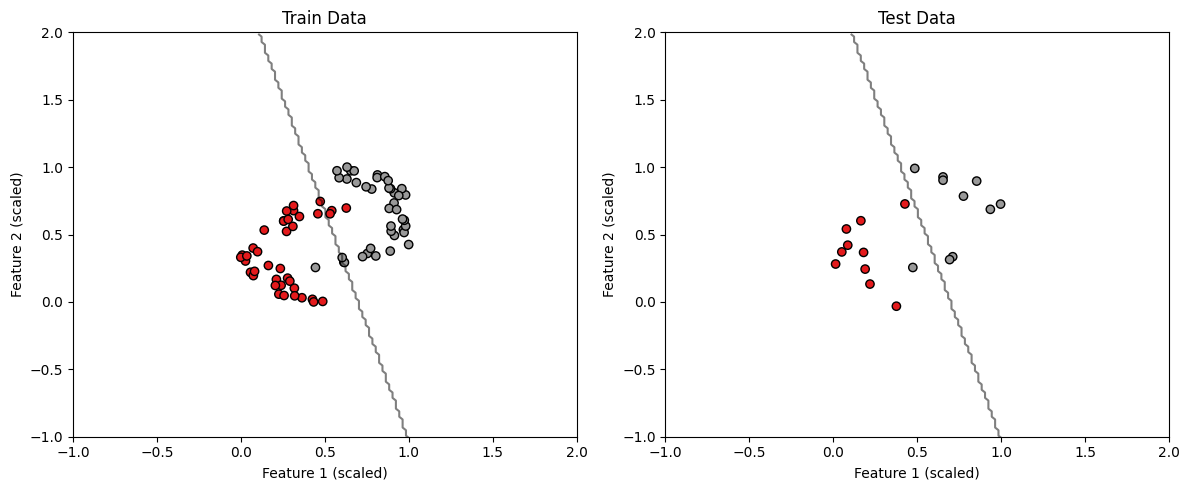

In [24]:
 visualize_boundary(X_train, X_test, Y_train, Y_test, model_use, h=0.02)

In [34]:
# 비선형 svm - poly(다항함수)
from sklearn.model_selection import ParameterGrid
#사용 하이퍼파라미터: poly의 경우 C, degree = 다항함수 차원을 결정, coef0 =상수항 계수, gamma= 커널의 곡률을 결정함

param_grid = {"C": [0.01, 0.05,0.1, 1, 5, 10, 100],
              "degree":list(range(10)),
              "coef0": np.arange(-1,1,0.2)
              }

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(param_grid))

# Grid search 진행
score_list = []
for params2 in params_list:
  model_use = SVC(kernel='poly',C = params2["C"],degree = params2["degree"], coef0=params2["coef0"])
  model_use.fit(X_train, Y_train)
  valid_pred = model_use.predict(X_test)
  tem = f1_score(valid_pred,Y_test) # 성능지표 = f1-score 사용
  score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 1.0
BEST PARAMS {'C': 0.01, 'coef0': 0.5999999999999996, 'degree': 9}


In [35]:
# best case의 하이퍼파라미터로 SVM
model_use = SVC(kernel='poly',C = params_list[best_index]["C"],degree = params_list[best_index]["degree"], coef0=params_list[best_index]["coef0"])

model_use.fit(X_train, Y_train)
pred_train = model_use.predict(X_train)
pred_test = model_use.predict(X_test)
tem = f1_score(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)


1.0
Train 데이터 성능
model의 recall 값은 1.000
model의 2종 오류 확률 값은 0.000
model의 Specificity 값은 1.000
model의 1종 오류 확률 값은 0.000
model의 precision 값은 1.000
model의 f1_score 값은 1.000
model의 G-mean 값은 1.000
model의 accuracy 값은 1.000
 
TEST 데이터 성능
model의 recall 값은 1.000
model의 2종 오류 확률 값은 0.000
model의 Specificity 값은 1.000
model의 1종 오류 확률 값은 0.000
model의 precision 값은 1.000
model의 f1_score 값은 1.000
model의 G-mean 값은 1.000
model의 accuracy 값은 1.000


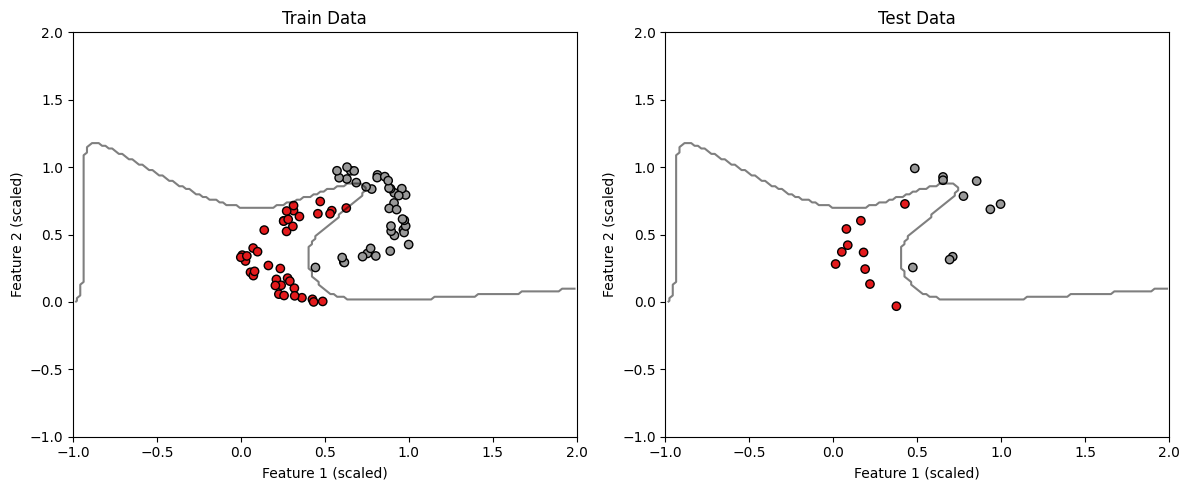

In [36]:
 visualize_boundary(X_train, X_test, Y_train, Y_test, model_use, h=0.02)

In [37]:
# 비선형 svm - rbf
from sklearn.model_selection import ParameterGrid
# 사용 하이퍼파라미터:C, gamma = 커널의 곡률을 결정함

#gamma: 커널 계수를 조절하는 파라미터. 클수록 모델이 훈련 데이터에 fitting 되며, 작을수록 일반화
# 작은 gamma 값은 결정 경계를 부드럽게 만들어 과소적합을 유발하는 반면, 반대로 큰 gamma 값은 결정 경계를 복잡하게 만들어 과대적합을 유발함
param_grid = {"C": [0.01, 0.05,0.1, 1, 5,10],
              "gamma": [0.001,0.004,0.005,0.007, 0.1,1,5,10]}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(param_grid))

# Grid search 진행
score_list = []
for params2 in params_list:
  model_use = SVC(kernel='rbf',C = params2["C"],gamma = params2["gamma"])
  model_use.fit(X_train, Y_train)
  valid_pred = model_use.predict(X_test)
  tem = f1_score(valid_pred,Y_test) # 성능지표 = f1-score 사용
  score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 1.0
BEST PARAMS {'C': 1, 'gamma': 10}


In [38]:
# best case의 하이퍼파라미터로 SVM
model_use = SVC(kernel='rbf',C = params_list[best_index]["C"],gamma = params_list[best_index]["gamma"])
# model_use = SVC(kernel='rbf',C = params_list[best_index]["C"],gamma =1000) #0.1, 1, 1000 넣고 비교해보기

model_use.fit(X_train, Y_train)
pred_train = model_use.predict(X_train)
pred_test = model_use.predict(X_test)
tem = f1_score(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)


1.0
Train 데이터 성능
model의 recall 값은 1.000
model의 2종 오류 확률 값은 0.000
model의 Specificity 값은 1.000
model의 1종 오류 확률 값은 0.000
model의 precision 값은 1.000
model의 f1_score 값은 1.000
model의 G-mean 값은 1.000
model의 accuracy 값은 1.000
 
TEST 데이터 성능
model의 recall 값은 1.000
model의 2종 오류 확률 값은 0.000
model의 Specificity 값은 1.000
model의 1종 오류 확률 값은 0.000
model의 precision 값은 1.000
model의 f1_score 값은 1.000
model의 G-mean 값은 1.000
model의 accuracy 값은 1.000


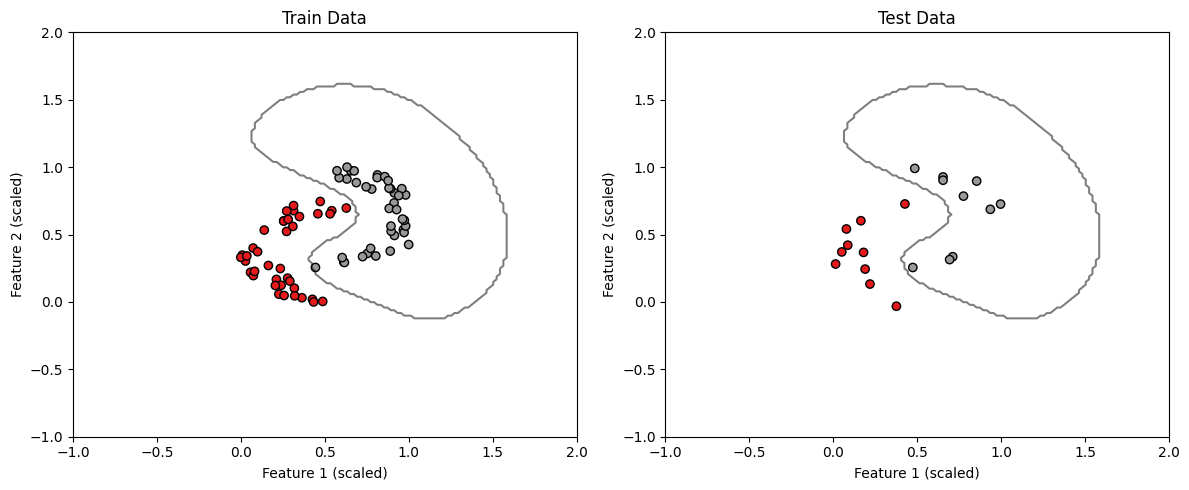

In [39]:
 visualize_boundary(X_train, X_test, Y_train, Y_test, model_use, h=0.02)

In [45]:
# 비선형 svm - sigmoid
from sklearn.model_selection import ParameterGrid
# 사용 하이퍼파라미터: coef0 = 상수항, gamma

#더 다양하고 촘촘한 값에 대한 실험을 원한다면, 'coef0': np.arange(-5,100,1)→-5 부터 99까지 1간격으로 선택
param_grid = {"C": [0.01, 0.05,0.1, 1, 5,10, 100],
              "gamma": [0.001,0.004,0.005,0.007, 0.1,1,5,10],
              'coef0': [-5,-2,-1,-0.01,-0.001,0.001,0.01, 0.05,0.1, 1, 5,10, 100]}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(param_grid))

# Grid search 진행
score_list = []
for params2 in params_list:
  model_use = SVC(kernel='sigmoid',C = params2["C"],gamma = params2['gamma'],coef0 = params2['coef0'])
  model_use.fit(X_train, Y_train)
  valid_pred = model_use.predict(X_test)
  tem = f1_score(valid_pred,Y_test) # 성능지표 = f1-score 사용
  score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 0.9523809523809523
BEST PARAMS {'C': 0.01, 'coef0': -0.01, 'gamma': 1}


In [46]:
params_list[best_index]

{'C': 0.01, 'coef0': -0.01, 'gamma': 1}

In [47]:
# best case의 하이퍼파라미터로 SVM
model_use = SVC(kernel='sigmoid',C = params_list[best_index]["C"],gamma = params_list[best_index]["gamma"],coef0 = params_list[best_index]["coef0"])

model_use.fit(X_train, Y_train)
pred_train = model_use.predict(X_train)
pred_test = model_use.predict(X_test)
tem = f1_score(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)


0.9523809523809523
Train 데이터 성능
model의 recall 값은 1.000
model의 2종 오류 확률 값은 0.000
model의 Specificity 값은 0.650
model의 1종 오류 확률 값은 0.350
model의 precision 값은 0.741
model의 f1_score 값은 0.851
model의 G-mean 값은 0.806
model의 accuracy 값은 0.825
 
TEST 데이터 성능
model의 recall 값은 1.000
model의 2종 오류 확률 값은 0.000
model의 Specificity 값은 0.900
model의 1종 오류 확률 값은 0.100
model의 precision 값은 0.909
model의 f1_score 값은 0.952
model의 G-mean 값은 0.949
model의 accuracy 값은 0.950


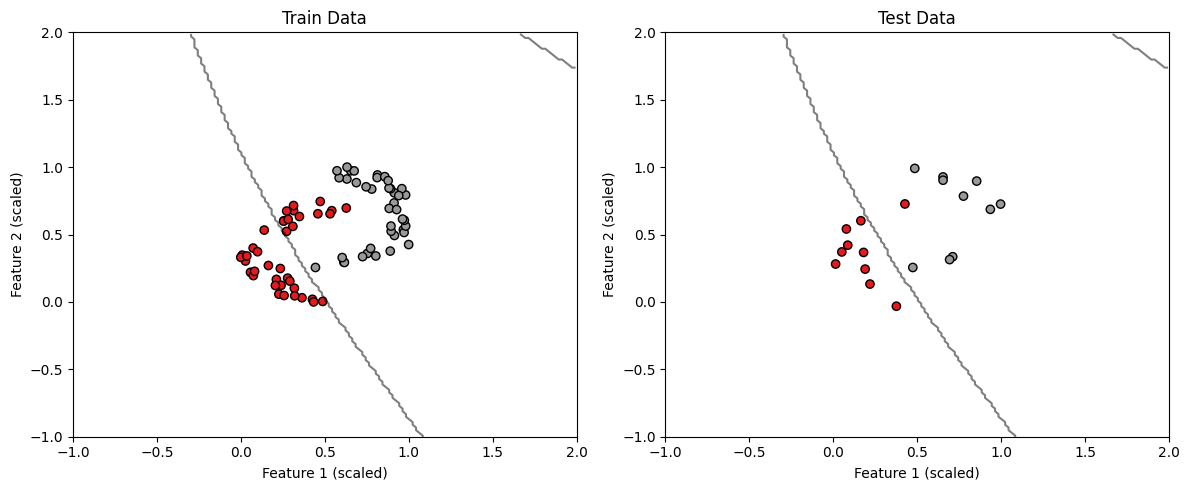

In [48]:
 visualize_boundary(X_train, X_test, Y_train, Y_test, model_use, h=0.02)

## class_balance 데이터셋

In [49]:
# 데이터 로드
URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 위치 설정
df = pd.read_csv(URL+"data/class_balance.csv")
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X466,X467,X468,X469,X470,X471,X472,X473,X474,Y
0,0.457896,0.530189,0.276976,0.359864,0.193059,0.322190,0.706897,0.553781,0.653894,0.375204,...,0.246376,0.711806,0.008532,0.013672,0.008467,0.402240,0.238811,0.274876,0.210238,-1
1,0.607100,0.341478,0.518992,0.395300,0.042071,0.469654,0.750000,0.542031,0.447466,0.189233,...,0.523785,0.760417,0.030930,0.033203,0.029759,0.210356,0.309339,0.328358,0.439175,-1
2,0.360781,0.369653,0.341039,0.021697,0.181737,0.528684,0.491379,0.516722,0.300371,0.376835,...,0.185769,0.659722,0.005333,0.003906,0.005311,0.381877,0.208171,0.208955,0.155761,-1
3,0.460910,0.413500,0.535685,0.302794,0.242326,0.408966,0.646552,0.561615,0.415328,0.313214,...,0.246376,0.000000,1.000000,1.000000,1.000000,0.381877,0.208171,0.208955,0.155761,-1
4,0.263068,0.279821,0.535685,0.302794,0.242326,0.408966,0.646552,0.638747,0.660074,0.520392,...,0.110711,0.517361,0.023677,0.022461,0.023447,0.608414,0.212062,0.268657,0.092827,-1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Columns: 475 entries, X1 to Y
dtypes: float64(468), int64(7)
memory usage: 942.7 KB


In [51]:
from sklearn.metrics import f1_score

#입력변수 출력변수 분할
data_X = df.drop(["Y"], axis = 1)
data_Y = df['Y']

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size = 0.2, random_state = 50)

# 스케일링
scaler =MinMaxScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Linear SVM
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import ParameterGrid

#C가 크면:har margine→overfit(에러 허용↓), C가 작으면: soft margine→underfit(에러 허용↑)
param_grid = {"C": [0.01, 0.05,0.1, 1, 5,10, 100]}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(param_grid))

# Grid search 진행
score_list = []
for params2 in params_list:
  #방법1
  # model_use = LinearSVC(C = params2["C"])
  #방법2
  model_use = SVC(kernel='linear',C = params2["C"])

  model_use.fit(X_train, Y_train)
  valid_pred = model_use.predict(X_test)
  tem = f1_score(valid_pred,Y_test) # 성능지표 = f1-score 사용
  score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 0.8
BEST PARAMS {'C': 0.05}


In [53]:
# best case의 하이퍼파라미터로 설정
model_use = SVC(kernel='linear',C = params_list[best_index]["C"])

model_use.fit(X_train, Y_train)
pred_train = model_use.predict(X_train)
pred_test = model_use.predict(X_test)
tem = f1_score(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)


0.8
Train 데이터 성능
model의 recall 값은 0.762
model의 2종 오류 확률 값은 0.238
model의 Specificity 값은 0.992
model의 1종 오류 확률 값은 0.008
model의 precision 값은 0.985
model의 f1_score 값은 0.859
model의 G-mean 값은 0.869
model의 accuracy 값은 0.897
 
TEST 데이터 성능
model의 recall 값은 0.700
model의 2종 오류 확률 값은 0.300
model의 Specificity 값은 0.968
model의 1종 오류 확률 값은 0.032
model의 precision 값은 0.933
model의 f1_score 값은 0.800
model의 G-mean 값은 0.823
model의 accuracy 값은 0.863


In [54]:
# 비선형 svm - poly
from sklearn.model_selection import ParameterGrid
# poly의 경우 C, degree = 다항함수 차원을 결정

param_grid = {"C": [0.01, 0.05,0.1, 1, 5,10, 100],
              #"gamma": [0.001,0.004,0.005,0.007, 0.1,1,5,10,50,100,'auto']
              "degree":list(range(10))}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(param_grid))

# Grid search 진행
score_list = []
for params2 in params_list:
  model_use = SVC(kernel='poly',C = params2["C"],degree = params2["degree"])
  model_use.fit(X_train, Y_train)
  valid_pred = model_use.predict(X_test)
  tem = f1_score(valid_pred,Y_test) # 성능지표 = f1-score 사용
  score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 0.8648648648648648
BEST PARAMS {'C': 0.01, 'degree': 7}


In [55]:
# best case의 하이퍼파라미터로 SVM
model_use = SVC(kernel='poly',C = params_list[best_index]["C"],degree = params_list[best_index]["degree"])

model_use.fit(X_train, Y_train)
pred_train = model_use.predict(X_train)
pred_test = model_use.predict(X_test)
tem = f1_score(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)


0.8648648648648648
Train 데이터 성능
model의 recall 값은 0.988
model의 2종 오류 확률 값은 0.012
model의 Specificity 값은 1.000
model의 1종 오류 확률 값은 0.000
model의 precision 값은 1.000
model의 f1_score 값은 0.994
model의 G-mean 값은 0.994
model의 accuracy 값은 0.995
 
TEST 데이터 성능
model의 recall 값은 0.800
model의 2종 오류 확률 값은 0.200
model의 Specificity 값은 0.968
model의 1종 오류 확률 값은 0.032
model의 precision 값은 0.941
model의 f1_score 값은 0.865
model의 G-mean 값은 0.880
model의 accuracy 값은 0.902


In [56]:
# 비선형 svm - rbf
from sklearn.model_selection import ParameterGrid
# rbf 경우 C, gamma = 가우시안 커널의 곡률을 결정함
# 작은 gamma 값은 결정 경계를 부드럽게 만들어 과소적합을 유발하는 반면, 반대로 큰 gamma 값은 결정 경계를 복잡하게 만들어 과대적합을 유발함

#gamma: 커널 계수를 조절하는 파라미터. 클수록 모델이 훈련 데이터에 fitting 되며, 작을수록 일반화
param_grid = {"C": [0.01, 0.05,0.1, 1, 5,10],
              "gamma": [0.001,0.004,0.005,0.007, 0.1,1,5,10]}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(param_grid))

# Grid search 진행
score_list = []
for params2 in params_list:
  model_use = SVC(kernel='rbf',C = params2["C"],gamma = params2["gamma"])
  model_use.fit(X_train, Y_train)
  valid_pred = model_use.predict(X_test)
  tem = f1_score(valid_pred,Y_test) # 성능지표 = f1-score 사용
  score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 0.8333333333333334
BEST PARAMS {'C': 5, 'gamma': 0.004}


In [57]:
# best case의 하이퍼파라미터로 SVM
model_use = SVC(kernel='rbf',C = params_list[best_index]["C"],gamma = params_list[best_index]["gamma"])

model_use.fit(X_train, Y_train)
pred_train = model_use.predict(X_train)
pred_test = model_use.predict(X_test)
tem = f1_score(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)


0.8333333333333334
Train 데이터 성능
model의 recall 값은 0.762
model의 2종 오류 확률 값은 0.238
model의 Specificity 값은 0.992
model의 1종 오류 확률 값은 0.008
model의 precision 값은 0.985
model의 f1_score 값은 0.859
model의 G-mean 값은 0.869
model의 accuracy 값은 0.897
 
TEST 데이터 성능
model의 recall 값은 0.750
model의 2종 오류 확률 값은 0.250
model의 Specificity 값은 0.968
model의 1종 오류 확률 값은 0.032
model의 precision 값은 0.938
model의 f1_score 값은 0.833
model의 G-mean 값은 0.852
model의 accuracy 값은 0.882


In [58]:
# 비선형 svm - sigmoid
from sklearn.model_selection import ParameterGrid
# coef0: 상수항

param_grid = {"C": [0.01, 0.05,0.1, 1, 5,10, 100],
              'coef0': [-5,-2,-1,-0.01,-0.001,0.001,0.01, 0.05,0.1, 1, 5,10, 100]}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(param_grid))

# Grid search 진행
score_list = []
for params2 in params_list:
  model_use = SVC(kernel='sigmoid',C = params2["C"],coef0 = params2['coef0'])
  model_use.fit(X_train, Y_train)
  valid_pred = model_use.predict(X_test)
  tem = f1_score(valid_pred,Y_test) # 성능지표 = f1-score 사용
  score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 0.8648648648648648
BEST PARAMS {'C': 10, 'coef0': -0.01}


In [59]:
params_list[best_index]

{'C': 10, 'coef0': -0.01}

In [60]:
# best case의 하이퍼파라미터로 SVM
model_use = SVC(kernel='sigmoid',C = params_list[best_index]["C"],coef0 = params_list[best_index]["coef0"])

model_use.fit(X_train, Y_train)
pred_train = model_use.predict(X_train)
pred_test = model_use.predict(X_test)
tem = f1_score(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)


0.8648648648648648
Train 데이터 성능
model의 recall 값은 0.714
model의 2종 오류 확률 값은 0.286
model의 Specificity 값은 0.975
model의 1종 오류 확률 값은 0.025
model의 precision 값은 0.952
model의 f1_score 값은 0.816
model의 G-mean 값은 0.834
model의 accuracy 값은 0.867
 
TEST 데이터 성능
model의 recall 값은 0.800
model의 2종 오류 확률 값은 0.200
model의 Specificity 값은 0.968
model의 1종 오류 확률 값은 0.032
model의 precision 값은 0.941
model의 f1_score 값은 0.865
model의 G-mean 값은 0.880
model의 accuracy 값은 0.902


# Multi Class SVM

In [61]:
# MultiCLass SVM-붓꽃데이터
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# 데이터 로드
iris = datasets.load_iris()
X = np.array(iris.data)
X = X[:,[0,2]]

y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multiclass SVM 모델 학습
svm_model = SVC(kernel='linear', decision_function_shape='ovr')  # One-Vs-Rest 방식 사용
# svm_model = SVC(kernel='linear', decision_function_shape='ovo')  # One-Vs-One 방식 사용

svm_model.fit(X_train_scaled, y_train)

# 예측
y_pred = svm_model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


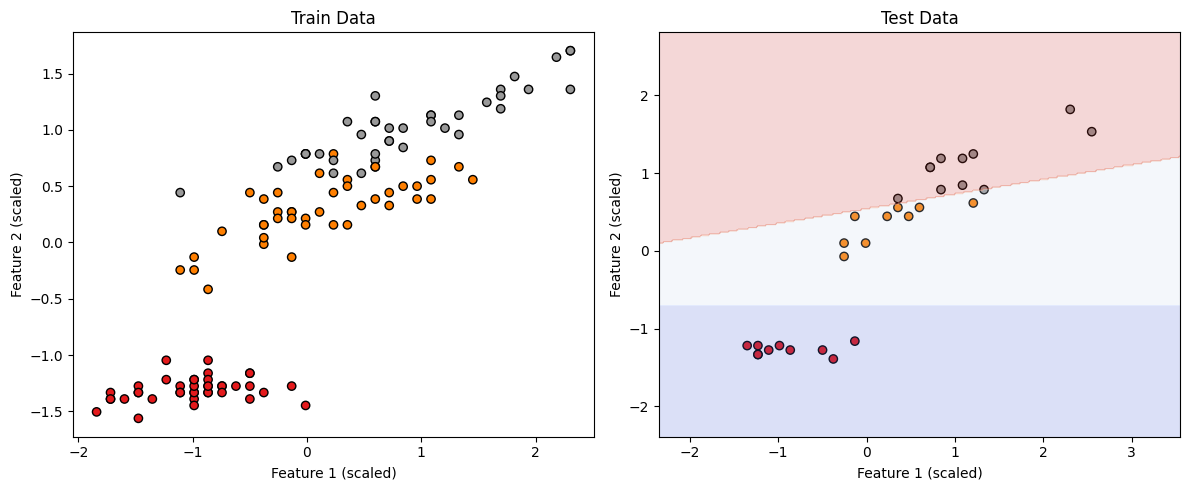

In [62]:
# 학습 데이터와 테스트 데이터의 분포 확인을 위한 시각화
plt.figure(figsize=(12, 5))

# 학습 데이터의 분포 시각화
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('Train Data')

# 테스트 데이터의 분포 시각화
plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('Test Data')

# 결정 경계 시각화
h = .02  # 결정 경계를 생성하기 위한 격자 간격
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

# 결과를 컬러 플롯으로 표현
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)

plt.tight_layout()
plt.show()


In [63]:
# 비선형 svm - rbf
from sklearn.model_selection import ParameterGrid

param_grid = {"C": [0.01, 0.05,0.1, 1, 5,10],
              "gamma": [0.001,0.004,0.005,0.007, 0.1,1,5,10]}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(param_grid))

# Grid search 진행
score_list = []
for params2 in params_list:
  svm_model = SVC(kernel='rbf',C = params2["C"],gamma = params2["gamma"])
  svm_model.fit(X_train_scaled, y_train)
  valid_pred = svm_model.predict(X_test_scaled)
  tem = accuracy_score(valid_pred,y_test) # 성능지표 = f1-score 사용
  score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 1.0
BEST PARAMS {'C': 0.1, 'gamma': 5}


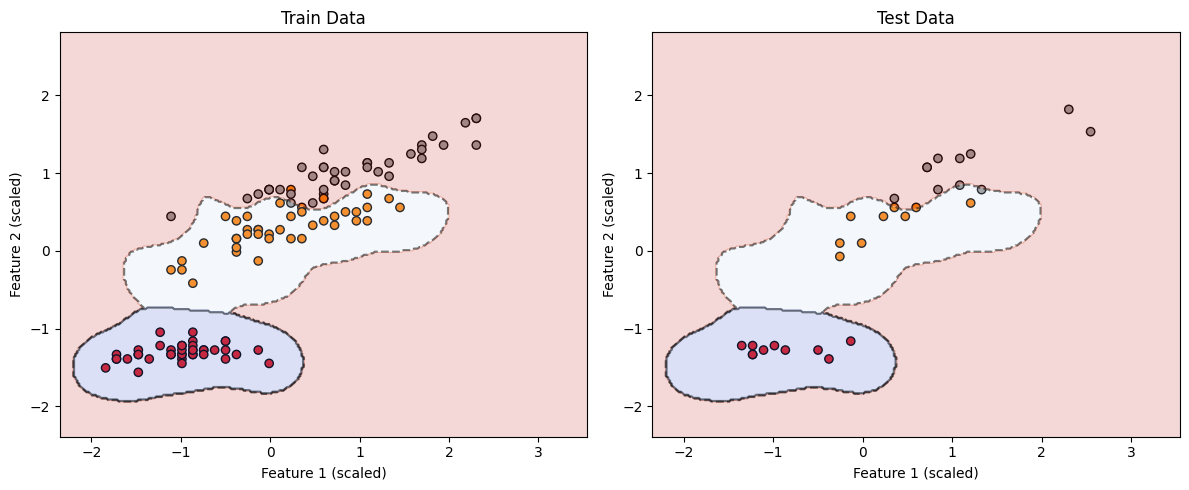

In [64]:
# 학습 데이터와 테스트 데이터의 분포 확인을 위한 시각화
plt.figure(figsize=(12, 5))

# 학습 데이터의 분포 시각화
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('Train Data')

# 결정 경계 시각화
h = .02  # 결정 경계를 생성하기 위한 격자 간격
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

# 결과를 컬러 플롯으로 표현
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# 테스트 데이터의 분포 시각화
plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('Test Data')

# 결정 경계 시각화
h = .02  # 결정 경계를 생성하기 위한 격자 간격
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

# 결과를 컬러 플롯으로 표현
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.tight_layout()
plt.show()